In [1]:
import torch 
import matplotlib.pylab as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms, models, datasets
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torchsummary import summary
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import os
import time
from utils_jnb import *

torch.manual_seed(0)

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [3]:
directory = "./src"

In [4]:
num_classes = 2

vgg19 = models.vgg19_bn(pretrained=True)

# Freeze model parameters
# Same for all
for param in vgg19.parameters():
    param.requires_grad = False

vgg19.classifier = nn.Sequential(nn.Linear(25088, 4096),
nn.ReLU(),
nn.Dropout(0.4),
nn.Linear(4096, 1024),
nn.ReLU(),
nn.Dropout(0.4),
nn.Linear(1024, num_classes),
nn.LogSoftmax(dim=1))

In [5]:
# Define Optimizer and Loss Function
lossFunc = nn.CrossEntropyLoss()
optimizer = optim.Adam(vgg19.parameters(), lr=1e-2)

# Decay LR by a factor of 0.1 every 7 epochs
expLrScheduler = lr_scheduler.StepLR(optimizer, step_size=6, gamma=0.1)

vgg19.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [6]:
summary(vgg19, input_size=(3, 224, 224), batch_size=32)

Layer (type:depth-idx)                   Param #
├─Sequential: 1-1                        --
|    └─Conv2d: 2-1                       (1,792)
|    └─BatchNorm2d: 2-2                  (128)
|    └─ReLU: 2-3                         --
|    └─Conv2d: 2-4                       (36,928)
|    └─BatchNorm2d: 2-5                  (128)
|    └─ReLU: 2-6                         --
|    └─MaxPool2d: 2-7                    --
|    └─Conv2d: 2-8                       (73,856)
|    └─BatchNorm2d: 2-9                  (256)
|    └─ReLU: 2-10                        --
|    └─Conv2d: 2-11                      (147,584)
|    └─BatchNorm2d: 2-12                 (256)
|    └─ReLU: 2-13                        --
|    └─MaxPool2d: 2-14                   --
|    └─Conv2d: 2-15                      (295,168)
|    └─BatchNorm2d: 2-16                 (512)
|    └─ReLU: 2-17                        --
|    └─Conv2d: 2-18                      (590,080)
|    └─BatchNorm2d: 2-19                 (512)
|    └─ReLU: 2-

Layer (type:depth-idx)                   Param #
├─Sequential: 1-1                        --
|    └─Conv2d: 2-1                       (1,792)
|    └─BatchNorm2d: 2-2                  (128)
|    └─ReLU: 2-3                         --
|    └─Conv2d: 2-4                       (36,928)
|    └─BatchNorm2d: 2-5                  (128)
|    └─ReLU: 2-6                         --
|    └─MaxPool2d: 2-7                    --
|    └─Conv2d: 2-8                       (73,856)
|    └─BatchNorm2d: 2-9                  (256)
|    └─ReLU: 2-10                        --
|    └─Conv2d: 2-11                      (147,584)
|    └─BatchNorm2d: 2-12                 (256)
|    └─ReLU: 2-13                        --
|    └─MaxPool2d: 2-14                   --
|    └─Conv2d: 2-15                      (295,168)
|    └─BatchNorm2d: 2-16                 (512)
|    └─ReLU: 2-17                        --
|    └─Conv2d: 2-18                      (590,080)
|    └─BatchNorm2d: 2-19                 (512)
|    └─ReLU: 2-

In [7]:
history = trainValid(vgg19, lossFunc, optimizer, epochs=25)

[4996, 556]
5552
Epoch: 1/25
Batch number: 000, Training: Loss: 0.6831, Accuracy: 0.5312
Batch number: 001, Training: Loss: 474.5312, Accuracy: 0.6875
Batch number: 002, Training: Loss: 105.5856, Accuracy: 0.3750
Batch number: 003, Training: Loss: 22.3058, Accuracy: 0.5938
Batch number: 004, Training: Loss: 4.1532, Accuracy: 0.8125
Batch number: 005, Training: Loss: 29.2498, Accuracy: 0.3125
Batch number: 006, Training: Loss: 7.8342, Accuracy: 0.6562
Batch number: 007, Training: Loss: 10.8726, Accuracy: 0.6875
Batch number: 008, Training: Loss: 1.8348, Accuracy: 0.8125
Batch number: 009, Training: Loss: 22.0495, Accuracy: 0.5000
Batch number: 010, Training: Loss: 1.6410, Accuracy: 0.8438
Batch number: 011, Training: Loss: 8.5229, Accuracy: 0.6250
Batch number: 012, Training: Loss: 8.9124, Accuracy: 0.5625
Batch number: 013, Training: Loss: 3.6875, Accuracy: 0.6875
Batch number: 014, Training: Loss: 11.8969, Accuracy: 0.5625
Batch number: 015, Training: Loss: 0.6116, Accuracy: 0.7812
Ba

Batch number: 136, Training: Loss: 0.3096, Accuracy: 0.8750
Batch number: 137, Training: Loss: 0.3415, Accuracy: 0.8750
Batch number: 138, Training: Loss: 0.3194, Accuracy: 0.7812
Batch number: 139, Training: Loss: 0.4601, Accuracy: 0.8438
Batch number: 140, Training: Loss: 0.1489, Accuracy: 0.9375
Batch number: 141, Training: Loss: 0.2442, Accuracy: 0.8438
Batch number: 142, Training: Loss: 0.2606, Accuracy: 0.8750
Batch number: 143, Training: Loss: 0.1885, Accuracy: 0.9375
Batch number: 144, Training: Loss: 1.1089, Accuracy: 0.7188
Batch number: 145, Training: Loss: 0.5301, Accuracy: 0.7812
Batch number: 146, Training: Loss: 0.1305, Accuracy: 0.9375
Batch number: 147, Training: Loss: 0.4247, Accuracy: 0.8438
Batch number: 148, Training: Loss: 0.2685, Accuracy: 0.9062
Batch number: 149, Training: Loss: 0.4062, Accuracy: 0.8750
Batch number: 150, Training: Loss: 0.2560, Accuracy: 0.9062
Batch number: 151, Training: Loss: 0.3428, Accuracy: 0.8125
Batch number: 152, Training: Loss: 0.274

Validation Batch number: 098, Validation: Loss: 0.2958, Accuracy: 1.0000
Validation Batch number: 099, Validation: Loss: 0.0001, Accuracy: 1.0000
Validation Batch number: 100, Validation: Loss: 0.2436, Accuracy: 1.0000
Validation Batch number: 101, Validation: Loss: 0.1984, Accuracy: 1.0000
Validation Batch number: 102, Validation: Loss: 0.0046, Accuracy: 1.0000
Validation Batch number: 103, Validation: Loss: 0.0455, Accuracy: 1.0000
Validation Batch number: 104, Validation: Loss: 0.2153, Accuracy: 1.0000
Validation Batch number: 105, Validation: Loss: 0.1183, Accuracy: 1.0000
Validation Batch number: 106, Validation: Loss: 0.2059, Accuracy: 1.0000
Validation Batch number: 107, Validation: Loss: 0.3518, Accuracy: 0.7500
Validation Batch number: 108, Validation: Loss: 0.0099, Accuracy: 1.0000
Validation Batch number: 109, Validation: Loss: 0.3226, Accuracy: 0.7500
Validation Batch number: 110, Validation: Loss: 0.0456, Accuracy: 1.0000
Validation Batch number: 111, Validation: Loss: 0.1

Batch number: 084, Training: Loss: 0.3979, Accuracy: 0.8125
Batch number: 085, Training: Loss: 0.7633, Accuracy: 0.7500
Batch number: 086, Training: Loss: 0.4243, Accuracy: 0.7812
Batch number: 087, Training: Loss: 0.4536, Accuracy: 0.6875
Batch number: 088, Training: Loss: 0.4220, Accuracy: 0.7500
Batch number: 089, Training: Loss: 0.4261, Accuracy: 0.7500
Batch number: 090, Training: Loss: 0.3542, Accuracy: 0.8125
Batch number: 091, Training: Loss: 0.4294, Accuracy: 0.7812
Batch number: 092, Training: Loss: 0.2849, Accuracy: 0.8750
Batch number: 093, Training: Loss: 0.2998, Accuracy: 0.9062
Batch number: 094, Training: Loss: 0.4143, Accuracy: 0.8125
Batch number: 095, Training: Loss: 0.4634, Accuracy: 0.7500
Batch number: 096, Training: Loss: 0.2840, Accuracy: 0.8438
Batch number: 097, Training: Loss: 0.3250, Accuracy: 0.8438
Batch number: 098, Training: Loss: 0.1747, Accuracy: 1.0000
Batch number: 099, Training: Loss: 0.2110, Accuracy: 0.9062
Batch number: 100, Training: Loss: 0.275

Validation Batch number: 057, Validation: Loss: 0.5024, Accuracy: 0.5000
Validation Batch number: 058, Validation: Loss: 0.5362, Accuracy: 0.5000
Validation Batch number: 059, Validation: Loss: 0.3475, Accuracy: 0.7500
Validation Batch number: 060, Validation: Loss: 0.6650, Accuracy: 0.7500
Validation Batch number: 061, Validation: Loss: 0.4219, Accuracy: 0.5000
Validation Batch number: 062, Validation: Loss: 0.6650, Accuracy: 0.7500
Validation Batch number: 063, Validation: Loss: 0.7549, Accuracy: 0.0000
Validation Batch number: 064, Validation: Loss: 0.5362, Accuracy: 0.5000
Validation Batch number: 065, Validation: Loss: 0.5974, Accuracy: 0.7500
Validation Batch number: 066, Validation: Loss: 0.3475, Accuracy: 0.7500
Validation Batch number: 067, Validation: Loss: 0.5062, Accuracy: 0.7500
Validation Batch number: 068, Validation: Loss: 0.3475, Accuracy: 0.7500
Validation Batch number: 069, Validation: Loss: 0.5062, Accuracy: 0.7500
Validation Batch number: 070, Validation: Loss: 0.6

Batch number: 034, Training: Loss: 0.4360, Accuracy: 0.7500
Batch number: 035, Training: Loss: 0.5810, Accuracy: 0.7500
Batch number: 036, Training: Loss: 0.4916, Accuracy: 0.8438
Batch number: 037, Training: Loss: 0.3769, Accuracy: 0.8125
Batch number: 038, Training: Loss: 0.5521, Accuracy: 0.7812
Batch number: 039, Training: Loss: 0.4432, Accuracy: 0.6875
Batch number: 040, Training: Loss: 0.3906, Accuracy: 0.7812
Batch number: 041, Training: Loss: 0.3779, Accuracy: 0.8438
Batch number: 042, Training: Loss: 0.5576, Accuracy: 0.7188
Batch number: 043, Training: Loss: 0.5125, Accuracy: 0.6562
Batch number: 044, Training: Loss: 0.3694, Accuracy: 0.8125
Batch number: 045, Training: Loss: 2.3760, Accuracy: 0.6875
Batch number: 046, Training: Loss: 1.0825, Accuracy: 0.6875
Batch number: 047, Training: Loss: 0.4670, Accuracy: 0.8438
Batch number: 048, Training: Loss: 0.3921, Accuracy: 0.8125
Batch number: 049, Training: Loss: 0.5242, Accuracy: 0.6250
Batch number: 050, Training: Loss: 0.485

Validation Batch number: 017, Validation: Loss: 0.4855, Accuracy: 0.7500
Validation Batch number: 018, Validation: Loss: 0.5820, Accuracy: 0.5000
Validation Batch number: 019, Validation: Loss: 0.1296, Accuracy: 1.0000
Validation Batch number: 020, Validation: Loss: 0.3889, Accuracy: 1.0000
Validation Batch number: 021, Validation: Loss: 0.6151, Accuracy: 0.7500
Validation Batch number: 022, Validation: Loss: 0.3889, Accuracy: 1.0000
Validation Batch number: 023, Validation: Loss: 0.4855, Accuracy: 0.7500
Validation Batch number: 024, Validation: Loss: 0.4855, Accuracy: 0.7500
Validation Batch number: 025, Validation: Loss: 0.2262, Accuracy: 0.7500
Validation Batch number: 026, Validation: Loss: 0.3889, Accuracy: 1.0000
Validation Batch number: 027, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 028, Validation: Loss: 0.3655, Accuracy: 1.0000
Validation Batch number: 029, Validation: Loss: 0.5186, Accuracy: 1.0000
Validation Batch number: 030, Validation: Loss: 0.3

Validation Batch number: 134, Validation: Loss: 0.6151, Accuracy: 0.7500
Validation Batch number: 135, Validation: Loss: 0.4855, Accuracy: 0.7500
Validation Batch number: 136, Validation: Loss: 0.5820, Accuracy: 0.5000
Validation Batch number: 137, Validation: Loss: 0.6786, Accuracy: 0.2500
Validation Batch number: 138, Validation: Loss: 0.3558, Accuracy: 0.7500
Epoch : 002, Training: Loss : 0.5672, Accuracy: 73.9592%
Validation : Loss : 0.4428, Accuracy: 73.3813%, Time: 50.9432s
Best accuracy achieved so far : 0.8813 on epoch 0
Epoch: 4/25
Batch number: 000, Training: Loss: 0.3218, Accuracy: 0.8125
Batch number: 001, Training: Loss: 0.5007, Accuracy: 0.6250
Batch number: 002, Training: Loss: 0.4522, Accuracy: 0.7188
Batch number: 003, Training: Loss: 0.4172, Accuracy: 0.7500
Batch number: 004, Training: Loss: 0.9574, Accuracy: 0.5312
Batch number: 005, Training: Loss: 0.3751, Accuracy: 0.7188
Batch number: 006, Training: Loss: 0.4392, Accuracy: 0.7500
Batch number: 007, Training: Loss

Batch number: 128, Training: Loss: 4.8398, Accuracy: 0.7500
Batch number: 129, Training: Loss: 0.4309, Accuracy: 0.7188
Batch number: 130, Training: Loss: 0.4950, Accuracy: 0.5625
Batch number: 131, Training: Loss: 0.4308, Accuracy: 0.7188
Batch number: 132, Training: Loss: 0.4215, Accuracy: 0.8125
Batch number: 133, Training: Loss: 0.4994, Accuracy: 0.6250
Batch number: 134, Training: Loss: 0.4037, Accuracy: 0.8125
Batch number: 135, Training: Loss: 0.4387, Accuracy: 0.7188
Batch number: 136, Training: Loss: 0.3953, Accuracy: 0.7812
Batch number: 137, Training: Loss: 0.3492, Accuracy: 0.8438
Batch number: 138, Training: Loss: 0.4102, Accuracy: 0.7812
Batch number: 139, Training: Loss: 0.5812, Accuracy: 0.6875
Batch number: 140, Training: Loss: 0.3498, Accuracy: 0.8438
Batch number: 141, Training: Loss: 0.7130, Accuracy: 0.6875
Batch number: 142, Training: Loss: 0.4845, Accuracy: 0.5938
Batch number: 143, Training: Loss: 0.3421, Accuracy: 0.8438
Batch number: 144, Training: Loss: 0.519

Validation Batch number: 091, Validation: Loss: 0.6273, Accuracy: 0.2500
Validation Batch number: 092, Validation: Loss: 0.7693, Accuracy: 0.2500
Validation Batch number: 093, Validation: Loss: 0.6350, Accuracy: 0.7500
Validation Batch number: 094, Validation: Loss: 0.2839, Accuracy: 1.0000
Validation Batch number: 095, Validation: Loss: 0.2839, Accuracy: 1.0000
Validation Batch number: 096, Validation: Loss: 0.7021, Accuracy: 0.5000
Validation Batch number: 097, Validation: Loss: 0.3511, Accuracy: 0.7500
Validation Batch number: 098, Validation: Loss: 0.6350, Accuracy: 0.7500
Validation Batch number: 099, Validation: Loss: 0.6273, Accuracy: 0.2500
Validation Batch number: 100, Validation: Loss: 0.4259, Accuracy: 1.0000
Validation Batch number: 101, Validation: Loss: 0.4259, Accuracy: 1.0000
Validation Batch number: 102, Validation: Loss: 0.4182, Accuracy: 0.5000
Validation Batch number: 103, Validation: Loss: 0.4182, Accuracy: 0.5000
Validation Batch number: 104, Validation: Loss: 0.2

Batch number: 076, Training: Loss: 0.5134, Accuracy: 0.6562
Batch number: 077, Training: Loss: 0.4739, Accuracy: 0.5938
Batch number: 078, Training: Loss: 1.3278, Accuracy: 0.6562
Batch number: 079, Training: Loss: 3.4236, Accuracy: 0.5938
Batch number: 080, Training: Loss: 0.3864, Accuracy: 0.7812
Batch number: 081, Training: Loss: 0.8592, Accuracy: 0.4688
Batch number: 082, Training: Loss: 0.4091, Accuracy: 0.7812
Batch number: 083, Training: Loss: 0.4425, Accuracy: 0.6875
Batch number: 084, Training: Loss: 0.5018, Accuracy: 0.6562
Batch number: 085, Training: Loss: 0.5494, Accuracy: 0.5312
Batch number: 086, Training: Loss: 0.5367, Accuracy: 0.6875
Batch number: 087, Training: Loss: 0.4957, Accuracy: 0.6875
Batch number: 088, Training: Loss: 0.5535, Accuracy: 0.7500
Batch number: 089, Training: Loss: 0.4976, Accuracy: 0.6562
Batch number: 090, Training: Loss: 0.6007, Accuracy: 0.6562
Batch number: 091, Training: Loss: 0.6115, Accuracy: 0.5000
Batch number: 092, Training: Loss: 0.579

Validation Batch number: 051, Validation: Loss: 0.3771, Accuracy: 0.5000
Validation Batch number: 052, Validation: Loss: 0.5360, Accuracy: 0.5000
Validation Batch number: 053, Validation: Loss: 0.6652, Accuracy: 0.7500
Validation Batch number: 054, Validation: Loss: 0.5063, Accuracy: 0.7500
Validation Batch number: 055, Validation: Loss: 0.5063, Accuracy: 0.7500
Validation Batch number: 056, Validation: Loss: 0.3475, Accuracy: 0.7500
Validation Batch number: 057, Validation: Loss: 0.5063, Accuracy: 0.7500
Validation Batch number: 058, Validation: Loss: 0.5063, Accuracy: 0.7500
Validation Batch number: 059, Validation: Loss: 0.3480, Accuracy: 0.7500
Validation Batch number: 060, Validation: Loss: 0.7246, Accuracy: 0.2500
Validation Batch number: 061, Validation: Loss: 0.3179, Accuracy: 1.0000
Validation Batch number: 062, Validation: Loss: 0.7246, Accuracy: 0.2500
Validation Batch number: 063, Validation: Loss: 0.6356, Accuracy: 1.0000
Validation Batch number: 064, Validation: Loss: 0.5

Batch number: 027, Training: Loss: 0.5440, Accuracy: 0.5625
Batch number: 028, Training: Loss: 0.5392, Accuracy: 0.6562
Batch number: 029, Training: Loss: 0.5290, Accuracy: 0.5312
Batch number: 030, Training: Loss: 0.5764, Accuracy: 0.4062
Batch number: 031, Training: Loss: 0.5843, Accuracy: 0.5938
Batch number: 032, Training: Loss: 0.5551, Accuracy: 0.7188
Batch number: 033, Training: Loss: 0.5226, Accuracy: 0.5938
Batch number: 034, Training: Loss: 0.5432, Accuracy: 0.5938
Batch number: 035, Training: Loss: 0.5592, Accuracy: 0.6562
Batch number: 036, Training: Loss: 0.5979, Accuracy: 0.6875
Batch number: 037, Training: Loss: 0.5686, Accuracy: 0.5312
Batch number: 038, Training: Loss: 0.4902, Accuracy: 0.7500
Batch number: 039, Training: Loss: 0.5280, Accuracy: 0.5625
Batch number: 040, Training: Loss: 0.4598, Accuracy: 0.6562
Batch number: 041, Training: Loss: 0.5179, Accuracy: 0.6562
Batch number: 042, Training: Loss: 0.5447, Accuracy: 0.7500
Batch number: 043, Training: Loss: 0.517

Validation Batch number: 011, Validation: Loss: 0.5153, Accuracy: 0.7500
Validation Batch number: 012, Validation: Loss: 0.2515, Accuracy: 0.7500
Validation Batch number: 013, Validation: Loss: 0.5246, Accuracy: 0.5000
Validation Batch number: 014, Validation: Loss: 0.5246, Accuracy: 0.5000
Validation Batch number: 015, Validation: Loss: 0.5153, Accuracy: 0.7500
Validation Batch number: 016, Validation: Loss: 0.6840, Accuracy: 0.7500
Validation Batch number: 017, Validation: Loss: 0.5153, Accuracy: 0.7500
Validation Batch number: 018, Validation: Loss: 0.5246, Accuracy: 0.5000
Validation Batch number: 019, Validation: Loss: 0.1687, Accuracy: 1.0000
Validation Batch number: 020, Validation: Loss: 0.5060, Accuracy: 1.0000
Validation Batch number: 021, Validation: Loss: 0.6840, Accuracy: 0.7500
Validation Batch number: 022, Validation: Loss: 0.5060, Accuracy: 1.0000
Validation Batch number: 023, Validation: Loss: 0.5153, Accuracy: 0.7500
Validation Batch number: 024, Validation: Loss: 0.5

Validation Batch number: 128, Validation: Loss: 0.3751, Accuracy: 1.0000
Validation Batch number: 129, Validation: Loss: 0.6840, Accuracy: 0.7500
Validation Batch number: 130, Validation: Loss: 0.7026, Accuracy: 0.2500
Validation Batch number: 131, Validation: Loss: 0.5246, Accuracy: 0.5000
Validation Batch number: 132, Validation: Loss: 0.5153, Accuracy: 0.7500
Validation Batch number: 133, Validation: Loss: 0.1687, Accuracy: 1.0000
Validation Batch number: 134, Validation: Loss: 0.6840, Accuracy: 0.7500
Validation Batch number: 135, Validation: Loss: 0.6933, Accuracy: 0.5000
Validation Batch number: 136, Validation: Loss: 0.7026, Accuracy: 0.2500
Validation Batch number: 137, Validation: Loss: 0.5340, Accuracy: 0.2500
Validation Batch number: 138, Validation: Loss: 0.4023, Accuracy: 0.7500
Epoch : 005, Training: Loss : 0.6968, Accuracy: 66.3131%
Validation : Loss : 0.4861, Accuracy: 69.0647%, Time: 50.5909s
Best accuracy achieved so far : 0.8813 on epoch 0
Epoch: 7/25
Batch number: 0

Batch number: 121, Training: Loss: 1.2680, Accuracy: 0.5312
Batch number: 122, Training: Loss: 0.8582, Accuracy: 0.6562
Batch number: 123, Training: Loss: 0.5056, Accuracy: 0.5938
Batch number: 124, Training: Loss: 4.2992, Accuracy: 0.5938
Batch number: 125, Training: Loss: 0.4911, Accuracy: 0.5625
Batch number: 126, Training: Loss: 1.9335, Accuracy: 0.5312
Batch number: 127, Training: Loss: 0.5826, Accuracy: 0.5625
Batch number: 128, Training: Loss: 0.6053, Accuracy: 0.5938
Batch number: 129, Training: Loss: 0.5877, Accuracy: 0.5000
Batch number: 130, Training: Loss: 0.5892, Accuracy: 0.3750
Batch number: 131, Training: Loss: 0.5853, Accuracy: 0.5000
Batch number: 132, Training: Loss: 0.5639, Accuracy: 0.5312
Batch number: 133, Training: Loss: 0.5823, Accuracy: 0.6875
Batch number: 134, Training: Loss: 0.6067, Accuracy: 0.5625
Batch number: 135, Training: Loss: 0.5603, Accuracy: 0.6562
Batch number: 136, Training: Loss: 0.5823, Accuracy: 0.6250
Batch number: 137, Training: Loss: 0.540

Validation Batch number: 086, Validation: Loss: 0.3704, Accuracy: 0.5000
Validation Batch number: 087, Validation: Loss: 0.1852, Accuracy: 0.7500
Validation Batch number: 088, Validation: Loss: 0.3471, Accuracy: 0.7500
Validation Batch number: 089, Validation: Loss: 0.5556, Accuracy: 0.2500
Validation Batch number: 090, Validation: Loss: 0.3704, Accuracy: 0.5000
Validation Batch number: 091, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 092, Validation: Loss: 0.6709, Accuracy: 0.7500
Validation Batch number: 093, Validation: Loss: 0.5556, Accuracy: 0.2500
Validation Batch number: 094, Validation: Loss: 0.3704, Accuracy: 0.5000
Validation Batch number: 095, Validation: Loss: 0.3704, Accuracy: 0.5000
Validation Batch number: 096, Validation: Loss: 0.5323, Accuracy: 0.5000
Validation Batch number: 097, Validation: Loss: 0.3471, Accuracy: 0.7500
Validation Batch number: 098, Validation: Loss: 0.5556, Accuracy: 0.2500
Validation Batch number: 099, Validation: Loss: 0.0

Batch number: 070, Training: Loss: 0.6075, Accuracy: 0.5312
Batch number: 071, Training: Loss: 0.5418, Accuracy: 0.6562
Batch number: 072, Training: Loss: 0.5115, Accuracy: 0.6875
Batch number: 073, Training: Loss: 0.5112, Accuracy: 0.7188
Batch number: 074, Training: Loss: 0.6314, Accuracy: 0.4375
Batch number: 075, Training: Loss: 0.4808, Accuracy: 0.6875
Batch number: 076, Training: Loss: 0.4948, Accuracy: 0.6562
Batch number: 077, Training: Loss: 0.5391, Accuracy: 0.6250
Batch number: 078, Training: Loss: 0.5815, Accuracy: 0.5625
Batch number: 079, Training: Loss: 0.5238, Accuracy: 0.6562
Batch number: 080, Training: Loss: 0.4576, Accuracy: 0.6250
Batch number: 081, Training: Loss: 0.4428, Accuracy: 0.8125
Batch number: 082, Training: Loss: 0.4830, Accuracy: 0.5938
Batch number: 083, Training: Loss: 0.4449, Accuracy: 0.6875
Batch number: 084, Training: Loss: 0.4852, Accuracy: 0.6562
Batch number: 085, Training: Loss: 0.4702, Accuracy: 0.7500
Batch number: 086, Training: Loss: 0.470

Validation Batch number: 045, Validation: Loss: 0.6756, Accuracy: 0.7500
Validation Batch number: 046, Validation: Loss: 0.7120, Accuracy: 0.2500
Validation Batch number: 047, Validation: Loss: 0.3469, Accuracy: 0.7500
Validation Batch number: 048, Validation: Loss: 0.5295, Accuracy: 0.5000
Validation Batch number: 049, Validation: Loss: 0.5112, Accuracy: 0.7500
Validation Batch number: 050, Validation: Loss: 0.5477, Accuracy: 0.2500
Validation Batch number: 051, Validation: Loss: 0.3651, Accuracy: 0.5000
Validation Batch number: 052, Validation: Loss: 0.5295, Accuracy: 0.5000
Validation Batch number: 053, Validation: Loss: 0.6756, Accuracy: 0.7500
Validation Batch number: 054, Validation: Loss: 0.3469, Accuracy: 0.7500
Validation Batch number: 055, Validation: Loss: 0.5112, Accuracy: 0.7500
Validation Batch number: 056, Validation: Loss: 0.3469, Accuracy: 0.7500
Validation Batch number: 057, Validation: Loss: 0.5112, Accuracy: 0.7500
Validation Batch number: 058, Validation: Loss: 0.5

Batch number: 020, Training: Loss: 0.5074, Accuracy: 0.4688
Batch number: 021, Training: Loss: 0.5186, Accuracy: 0.6562
Batch number: 022, Training: Loss: 0.5003, Accuracy: 0.5938
Batch number: 023, Training: Loss: 0.4367, Accuracy: 0.5938
Batch number: 024, Training: Loss: 0.4997, Accuracy: 0.5938
Batch number: 025, Training: Loss: 0.4979, Accuracy: 0.6875
Batch number: 026, Training: Loss: 0.5199, Accuracy: 0.6250
Batch number: 027, Training: Loss: 0.5624, Accuracy: 0.6562
Batch number: 028, Training: Loss: 0.4989, Accuracy: 0.5625
Batch number: 029, Training: Loss: 0.5195, Accuracy: 0.7188
Batch number: 030, Training: Loss: 0.5412, Accuracy: 0.7812
Batch number: 031, Training: Loss: 0.5453, Accuracy: 0.5625
Batch number: 032, Training: Loss: 0.5637, Accuracy: 0.4688
Batch number: 033, Training: Loss: 0.5088, Accuracy: 0.6562
Batch number: 034, Training: Loss: 0.5199, Accuracy: 0.6250
Batch number: 035, Training: Loss: 0.5197, Accuracy: 0.7188
Batch number: 036, Training: Loss: 0.540

Validation Batch number: 005, Validation: Loss: 0.4862, Accuracy: 0.7500
Validation Batch number: 006, Validation: Loss: 0.6173, Accuracy: 0.7500
Validation Batch number: 007, Validation: Loss: 0.6173, Accuracy: 0.7500
Validation Batch number: 008, Validation: Loss: 0.7104, Accuracy: 0.5000
Validation Batch number: 009, Validation: Loss: 0.3552, Accuracy: 0.7500
Validation Batch number: 010, Validation: Loss: 0.7104, Accuracy: 0.5000
Validation Batch number: 011, Validation: Loss: 0.5794, Accuracy: 0.5000
Validation Batch number: 012, Validation: Loss: 0.3931, Accuracy: 1.0000
Validation Batch number: 013, Validation: Loss: 0.5423, Accuracy: 0.7500
Validation Batch number: 014, Validation: Loss: 0.4862, Accuracy: 0.7500
Validation Batch number: 015, Validation: Loss: 0.5794, Accuracy: 0.5000
Validation Batch number: 016, Validation: Loss: 0.8035, Accuracy: 0.2500
Validation Batch number: 017, Validation: Loss: 0.7104, Accuracy: 0.5000
Validation Batch number: 018, Validation: Loss: 0.4

Validation Batch number: 122, Validation: Loss: 0.3552, Accuracy: 0.7500
Validation Batch number: 123, Validation: Loss: 0.8035, Accuracy: 0.2500
Validation Batch number: 124, Validation: Loss: 0.7104, Accuracy: 0.5000
Validation Batch number: 125, Validation: Loss: 0.4483, Accuracy: 0.5000
Validation Batch number: 126, Validation: Loss: 0.6173, Accuracy: 0.7500
Validation Batch number: 127, Validation: Loss: 0.3934, Accuracy: 1.0000
Validation Batch number: 128, Validation: Loss: 0.7104, Accuracy: 0.5000
Validation Batch number: 129, Validation: Loss: 0.8035, Accuracy: 0.2500
Validation Batch number: 130, Validation: Loss: 0.6173, Accuracy: 0.7500
Validation Batch number: 131, Validation: Loss: 0.4862, Accuracy: 0.7500
Validation Batch number: 132, Validation: Loss: 0.7104, Accuracy: 0.5000
Validation Batch number: 133, Validation: Loss: 0.2242, Accuracy: 0.7500
Validation Batch number: 134, Validation: Loss: 0.8035, Accuracy: 0.2500
Validation Batch number: 135, Validation: Loss: 0.7

Batch number: 113, Training: Loss: 0.5984, Accuracy: 0.6250
Batch number: 114, Training: Loss: 0.5984, Accuracy: 0.6250
Batch number: 115, Training: Loss: 0.6171, Accuracy: 0.6250
Batch number: 116, Training: Loss: 0.6295, Accuracy: 0.5625
Batch number: 117, Training: Loss: 0.6046, Accuracy: 0.7812
Batch number: 118, Training: Loss: 0.5978, Accuracy: 0.7188
Batch number: 119, Training: Loss: 0.5951, Accuracy: 0.6875
Batch number: 120, Training: Loss: 0.5932, Accuracy: 0.5625
Batch number: 121, Training: Loss: 0.5701, Accuracy: 0.7500
Batch number: 122, Training: Loss: 0.5796, Accuracy: 0.6250
Batch number: 123, Training: Loss: 0.5284, Accuracy: 0.6875
Batch number: 124, Training: Loss: 0.6284, Accuracy: 0.5000
Batch number: 125, Training: Loss: 0.6157, Accuracy: 0.6250
Batch number: 126, Training: Loss: 0.5919, Accuracy: 0.7188
Batch number: 127, Training: Loss: 0.5700, Accuracy: 0.5938
Batch number: 128, Training: Loss: 0.6045, Accuracy: 0.5312
Batch number: 129, Training: Loss: 0.589

Validation Batch number: 082, Validation: Loss: 0.1513, Accuracy: 1.0000
Validation Batch number: 083, Validation: Loss: 0.5000, Accuracy: 0.7500
Validation Batch number: 084, Validation: Loss: 0.5923, Accuracy: 0.2500
Validation Batch number: 085, Validation: Loss: 0.3487, Accuracy: 0.7500
Validation Batch number: 086, Validation: Loss: 0.3949, Accuracy: 0.5000
Validation Batch number: 087, Validation: Loss: 0.1974, Accuracy: 0.7500
Validation Batch number: 088, Validation: Loss: 0.5000, Accuracy: 0.7500
Validation Batch number: 089, Validation: Loss: 0.5923, Accuracy: 0.2500
Validation Batch number: 090, Validation: Loss: 0.3949, Accuracy: 0.5000
Validation Batch number: 091, Validation: Loss: 0.3025, Accuracy: 1.0000
Validation Batch number: 092, Validation: Loss: 0.6512, Accuracy: 0.7500
Validation Batch number: 093, Validation: Loss: 0.7436, Accuracy: 0.2500
Validation Batch number: 094, Validation: Loss: 0.3949, Accuracy: 0.5000
Validation Batch number: 095, Validation: Loss: 0.3

Batch number: 065, Training: Loss: 0.5652, Accuracy: 0.5938
Batch number: 066, Training: Loss: 0.5994, Accuracy: 0.5938
Batch number: 067, Training: Loss: 0.6016, Accuracy: 0.4688
Batch number: 068, Training: Loss: 0.4855, Accuracy: 0.7500
Batch number: 069, Training: Loss: 0.5648, Accuracy: 0.5938
Batch number: 070, Training: Loss: 0.5488, Accuracy: 0.5625
Batch number: 071, Training: Loss: 0.5137, Accuracy: 0.6875
Batch number: 072, Training: Loss: 0.5609, Accuracy: 0.6250
Batch number: 073, Training: Loss: 0.5539, Accuracy: 0.6875
Batch number: 074, Training: Loss: 0.5661, Accuracy: 0.4062
Batch number: 075, Training: Loss: 0.5677, Accuracy: 0.5625
Batch number: 076, Training: Loss: 0.5938, Accuracy: 0.5000
Batch number: 077, Training: Loss: 0.6133, Accuracy: 0.5000
Batch number: 078, Training: Loss: 0.5462, Accuracy: 0.5625
Batch number: 079, Training: Loss: 0.5409, Accuracy: 0.6250
Batch number: 080, Training: Loss: 0.5310, Accuracy: 0.4688
Batch number: 081, Training: Loss: 0.533

Validation Batch number: 040, Validation: Loss: 0.7183, Accuracy: 0.2500
Validation Batch number: 041, Validation: Loss: 0.5327, Accuracy: 0.5000
Validation Batch number: 042, Validation: Loss: 0.3471, Accuracy: 0.7500
Validation Batch number: 043, Validation: Loss: 0.6703, Accuracy: 0.7500
Validation Batch number: 044, Validation: Loss: 0.6703, Accuracy: 0.7500
Validation Batch number: 045, Validation: Loss: 0.6703, Accuracy: 0.7500
Validation Batch number: 046, Validation: Loss: 0.7183, Accuracy: 0.2500
Validation Batch number: 047, Validation: Loss: 0.3471, Accuracy: 0.7500
Validation Batch number: 048, Validation: Loss: 0.5327, Accuracy: 0.5000
Validation Batch number: 049, Validation: Loss: 0.5087, Accuracy: 0.7500
Validation Batch number: 050, Validation: Loss: 0.5567, Accuracy: 0.2500
Validation Batch number: 051, Validation: Loss: 0.3712, Accuracy: 0.5000
Validation Batch number: 052, Validation: Loss: 0.5327, Accuracy: 0.5000
Validation Batch number: 053, Validation: Loss: 0.6

Batch number: 014, Training: Loss: 0.5039, Accuracy: 0.4375
Batch number: 015, Training: Loss: 0.3909, Accuracy: 0.6562
Batch number: 016, Training: Loss: 0.4768, Accuracy: 0.5625
Batch number: 017, Training: Loss: 0.3879, Accuracy: 0.9062
Batch number: 018, Training: Loss: 0.4562, Accuracy: 0.6250
Batch number: 019, Training: Loss: 0.4569, Accuracy: 0.6250
Batch number: 020, Training: Loss: 0.4673, Accuracy: 0.8438
Batch number: 021, Training: Loss: 0.8982, Accuracy: 0.6250
Batch number: 022, Training: Loss: 0.4494, Accuracy: 0.7500
Batch number: 023, Training: Loss: 0.3802, Accuracy: 0.8438
Batch number: 024, Training: Loss: 0.4711, Accuracy: 0.7188
Batch number: 025, Training: Loss: 0.3872, Accuracy: 0.7500
Batch number: 026, Training: Loss: 0.4977, Accuracy: 0.6562
Batch number: 027, Training: Loss: 0.4543, Accuracy: 0.6875
Batch number: 028, Training: Loss: 0.5127, Accuracy: 0.6875
Batch number: 029, Training: Loss: 0.4642, Accuracy: 0.6250
Batch number: 030, Training: Loss: 0.474

Batch number: 151, Training: Loss: 0.6040, Accuracy: 0.6250
Batch number: 152, Training: Loss: 0.6195, Accuracy: 0.6562
Batch number: 153, Training: Loss: 0.6337, Accuracy: 0.5312
Batch number: 154, Training: Loss: 0.5882, Accuracy: 0.7812
Batch number: 155, Training: Loss: 0.6507, Accuracy: 0.5312
Validation Batch number: 000, Validation: Loss: 0.8081, Accuracy: 0.2500
Validation Batch number: 001, Validation: Loss: 0.9046, Accuracy: 0.0000
Validation Batch number: 002, Validation: Loss: 0.7117, Accuracy: 0.5000
Validation Batch number: 003, Validation: Loss: 0.6152, Accuracy: 0.7500
Validation Batch number: 004, Validation: Loss: 0.6152, Accuracy: 0.7500
Validation Batch number: 005, Validation: Loss: 0.6152, Accuracy: 0.7500
Validation Batch number: 006, Validation: Loss: 0.6152, Accuracy: 0.7500
Validation Batch number: 007, Validation: Loss: 0.6152, Accuracy: 0.7500
Validation Batch number: 008, Validation: Loss: 0.7117, Accuracy: 0.5000
Validation Batch number: 009, Validation: L

Validation Batch number: 112, Validation: Loss: 0.7117, Accuracy: 0.5000
Validation Batch number: 113, Validation: Loss: 0.6152, Accuracy: 0.7500
Validation Batch number: 114, Validation: Loss: 0.7117, Accuracy: 0.5000
Validation Batch number: 115, Validation: Loss: 0.5187, Accuracy: 1.0000
Validation Batch number: 116, Validation: Loss: 0.5187, Accuracy: 1.0000
Validation Batch number: 117, Validation: Loss: 0.4855, Accuracy: 0.7500
Validation Batch number: 118, Validation: Loss: 0.3558, Accuracy: 0.7500
Validation Batch number: 119, Validation: Loss: 0.8081, Accuracy: 0.2500
Validation Batch number: 120, Validation: Loss: 0.2769, Accuracy: 1.0000
Validation Batch number: 121, Validation: Loss: 0.7117, Accuracy: 0.5000
Validation Batch number: 122, Validation: Loss: 0.4855, Accuracy: 0.7500
Validation Batch number: 123, Validation: Loss: 0.8081, Accuracy: 0.2500
Validation Batch number: 124, Validation: Loss: 0.7117, Accuracy: 0.5000
Validation Batch number: 125, Validation: Loss: 0.5

Batch number: 101, Training: Loss: 0.5498, Accuracy: 0.6875
Batch number: 102, Training: Loss: 0.5907, Accuracy: 0.5625
Batch number: 103, Training: Loss: 0.4981, Accuracy: 0.6562
Batch number: 104, Training: Loss: 0.5540, Accuracy: 0.5625
Batch number: 105, Training: Loss: 0.5858, Accuracy: 0.4688
Batch number: 106, Training: Loss: 0.4983, Accuracy: 0.7812
Batch number: 107, Training: Loss: 0.5792, Accuracy: 0.5000
Batch number: 108, Training: Loss: 0.5085, Accuracy: 0.7188
Batch number: 109, Training: Loss: 0.5472, Accuracy: 0.4375
Batch number: 110, Training: Loss: 0.5214, Accuracy: 0.6250
Batch number: 111, Training: Loss: 0.5212, Accuracy: 0.6250
Batch number: 112, Training: Loss: 0.5410, Accuracy: 0.6250
Batch number: 113, Training: Loss: 0.4808, Accuracy: 0.6250
Batch number: 114, Training: Loss: 0.5006, Accuracy: 0.6250
Batch number: 115, Training: Loss: 0.5206, Accuracy: 0.6250
Batch number: 116, Training: Loss: 0.5869, Accuracy: 0.5625
Batch number: 117, Training: Loss: 0.508

Validation Batch number: 073, Validation: Loss: 0.5235, Accuracy: 0.5000
Validation Batch number: 074, Validation: Loss: 0.5235, Accuracy: 0.5000
Validation Batch number: 075, Validation: Loss: 0.1769, Accuracy: 0.7500
Validation Batch number: 076, Validation: Loss: 0.5235, Accuracy: 0.5000
Validation Batch number: 077, Validation: Loss: 0.5235, Accuracy: 0.5000
Validation Batch number: 078, Validation: Loss: 0.5164, Accuracy: 0.7500
Validation Batch number: 079, Validation: Loss: 0.3395, Accuracy: 1.0000
Validation Batch number: 080, Validation: Loss: 0.5164, Accuracy: 0.7500
Validation Batch number: 081, Validation: Loss: 0.5164, Accuracy: 0.7500
Validation Batch number: 082, Validation: Loss: 0.1697, Accuracy: 1.0000
Validation Batch number: 083, Validation: Loss: 0.3466, Accuracy: 0.7500
Validation Batch number: 084, Validation: Loss: 0.5307, Accuracy: 0.2500
Validation Batch number: 085, Validation: Loss: 0.3466, Accuracy: 0.7500
Validation Batch number: 086, Validation: Loss: 0.3

Batch number: 054, Training: Loss: 0.4590, Accuracy: 0.6562
Batch number: 055, Training: Loss: 0.5512, Accuracy: 0.6875
Batch number: 056, Training: Loss: 0.4837, Accuracy: 0.6250
Batch number: 057, Training: Loss: 0.5274, Accuracy: 0.5938
Batch number: 058, Training: Loss: 0.4981, Accuracy: 0.6562
Batch number: 059, Training: Loss: 0.4337, Accuracy: 0.8125
Batch number: 060, Training: Loss: 0.4462, Accuracy: 0.6250
Batch number: 061, Training: Loss: 0.4982, Accuracy: 0.6562
Batch number: 062, Training: Loss: 0.4220, Accuracy: 0.6562
Batch number: 063, Training: Loss: 0.4819, Accuracy: 0.7500
Batch number: 064, Training: Loss: 0.5063, Accuracy: 0.7188
Batch number: 065, Training: Loss: 0.4682, Accuracy: 0.7188
Batch number: 066, Training: Loss: 0.5116, Accuracy: 0.6875
Batch number: 067, Training: Loss: 0.4112, Accuracy: 0.7188
Batch number: 068, Training: Loss: 0.4809, Accuracy: 0.7500
Batch number: 069, Training: Loss: 0.4925, Accuracy: 0.6875
Batch number: 070, Training: Loss: 0.554

Validation Batch number: 034, Validation: Loss: 0.5479, Accuracy: 0.5000
Validation Batch number: 035, Validation: Loss: 0.5969, Accuracy: 0.2500
Validation Batch number: 036, Validation: Loss: 0.7469, Accuracy: 0.2500
Validation Batch number: 037, Validation: Loss: 0.3979, Accuracy: 0.5000
Validation Batch number: 038, Validation: Loss: 0.6979, Accuracy: 0.5000
Validation Batch number: 039, Validation: Loss: 0.3000, Accuracy: 1.0000
Validation Batch number: 040, Validation: Loss: 0.7469, Accuracy: 0.2500
Validation Batch number: 041, Validation: Loss: 0.5479, Accuracy: 0.5000
Validation Batch number: 042, Validation: Loss: 0.3490, Accuracy: 0.7500
Validation Batch number: 043, Validation: Loss: 0.6490, Accuracy: 0.7500
Validation Batch number: 044, Validation: Loss: 0.6490, Accuracy: 0.7500
Validation Batch number: 045, Validation: Loss: 0.6490, Accuracy: 0.7500
Validation Batch number: 046, Validation: Loss: 0.7469, Accuracy: 0.2500
Validation Batch number: 047, Validation: Loss: 0.3

Batch number: 006, Training: Loss: 0.4668, Accuracy: 0.6250
Batch number: 007, Training: Loss: 0.5351, Accuracy: 0.5625
Batch number: 008, Training: Loss: 0.5596, Accuracy: 0.5312
Batch number: 009, Training: Loss: 0.4869, Accuracy: 0.7188
Batch number: 010, Training: Loss: 0.4625, Accuracy: 0.7500
Batch number: 011, Training: Loss: 0.4959, Accuracy: 0.5625
Batch number: 012, Training: Loss: 0.5688, Accuracy: 0.4688
Batch number: 013, Training: Loss: 0.5364, Accuracy: 0.6562
Batch number: 014, Training: Loss: 3.1548, Accuracy: 0.4375
Batch number: 015, Training: Loss: 0.4785, Accuracy: 0.6562
Batch number: 016, Training: Loss: 0.5109, Accuracy: 0.5625
Batch number: 017, Training: Loss: 0.4745, Accuracy: 0.5312
Batch number: 018, Training: Loss: 0.5301, Accuracy: 0.7188
Batch number: 019, Training: Loss: 0.5109, Accuracy: 0.7188
Batch number: 020, Training: Loss: 0.5363, Accuracy: 0.4688
Batch number: 021, Training: Loss: 0.5584, Accuracy: 0.6562
Batch number: 022, Training: Loss: 0.636

Batch number: 143, Training: Loss: 0.5255, Accuracy: 0.6250
Batch number: 144, Training: Loss: 0.5823, Accuracy: 0.6875
Batch number: 145, Training: Loss: 0.5335, Accuracy: 0.5938
Batch number: 146, Training: Loss: 0.5820, Accuracy: 0.6875
Batch number: 147, Training: Loss: 0.5876, Accuracy: 0.5938
Batch number: 148, Training: Loss: 0.6036, Accuracy: 0.5312
Batch number: 149, Training: Loss: 0.5697, Accuracy: 0.5938
Batch number: 150, Training: Loss: 0.6314, Accuracy: 0.5625
Batch number: 151, Training: Loss: 0.5617, Accuracy: 0.6250
Batch number: 152, Training: Loss: 0.5178, Accuracy: 0.6562
Batch number: 153, Training: Loss: 0.5845, Accuracy: 0.5312
Batch number: 154, Training: Loss: 0.5604, Accuracy: 0.7812
Batch number: 155, Training: Loss: 0.5657, Accuracy: 0.5312
Validation Batch number: 000, Validation: Loss: 0.7589, Accuracy: 0.2500
Validation Batch number: 001, Validation: Loss: 0.8177, Accuracy: 0.0000
Validation Batch number: 002, Validation: Loss: 0.7001, Accuracy: 0.5000
V

Validation Batch number: 104, Validation: Loss: 0.5545, Accuracy: 0.5000
Validation Batch number: 105, Validation: Loss: 0.6412, Accuracy: 0.7500
Validation Batch number: 106, Validation: Loss: 0.7001, Accuracy: 0.5000
Validation Batch number: 107, Validation: Loss: 0.5545, Accuracy: 0.5000
Validation Batch number: 108, Validation: Loss: 0.4956, Accuracy: 0.7500
Validation Batch number: 109, Validation: Loss: 0.7001, Accuracy: 0.5000
Validation Batch number: 110, Validation: Loss: 0.5824, Accuracy: 1.0000
Validation Batch number: 111, Validation: Loss: 0.6412, Accuracy: 0.7500
Validation Batch number: 112, Validation: Loss: 0.7001, Accuracy: 0.5000
Validation Batch number: 113, Validation: Loss: 0.6412, Accuracy: 0.7500
Validation Batch number: 114, Validation: Loss: 0.7001, Accuracy: 0.5000
Validation Batch number: 115, Validation: Loss: 0.5824, Accuracy: 1.0000
Validation Batch number: 116, Validation: Loss: 0.5824, Accuracy: 1.0000
Validation Batch number: 117, Validation: Loss: 0.3

Batch number: 091, Training: Loss: 0.4503, Accuracy: 0.8125
Batch number: 092, Training: Loss: 0.4520, Accuracy: 0.7188
Batch number: 093, Training: Loss: 0.3765, Accuracy: 0.9062
Batch number: 094, Training: Loss: 0.4067, Accuracy: 0.8438
Batch number: 095, Training: Loss: 0.4422, Accuracy: 0.6562
Batch number: 096, Training: Loss: 0.4114, Accuracy: 0.7188
Batch number: 097, Training: Loss: 2.4696, Accuracy: 0.6562
Batch number: 098, Training: Loss: 0.4924, Accuracy: 0.6875
Batch number: 099, Training: Loss: 0.6329, Accuracy: 0.6562
Batch number: 100, Training: Loss: 0.3548, Accuracy: 0.8125
Batch number: 101, Training: Loss: 0.4870, Accuracy: 0.6250
Batch number: 102, Training: Loss: 0.4605, Accuracy: 0.7500
Batch number: 103, Training: Loss: 0.3797, Accuracy: 0.7812
Batch number: 104, Training: Loss: 0.4854, Accuracy: 0.7188
Batch number: 105, Training: Loss: 0.4898, Accuracy: 0.7812
Batch number: 106, Training: Loss: 0.4839, Accuracy: 0.5625
Batch number: 107, Training: Loss: 0.521

Validation Batch number: 059, Validation: Loss: 0.3477, Accuracy: 0.7500
Validation Batch number: 060, Validation: Loss: 0.6620, Accuracy: 0.7500
Validation Batch number: 061, Validation: Loss: 0.3811, Accuracy: 0.5000
Validation Batch number: 062, Validation: Loss: 0.6620, Accuracy: 0.7500
Validation Batch number: 063, Validation: Loss: 0.7621, Accuracy: 0.0000
Validation Batch number: 064, Validation: Loss: 0.5382, Accuracy: 0.5000
Validation Batch number: 065, Validation: Loss: 0.6620, Accuracy: 0.7500
Validation Batch number: 066, Validation: Loss: 0.3477, Accuracy: 0.7500
Validation Batch number: 067, Validation: Loss: 0.5048, Accuracy: 0.7500
Validation Batch number: 068, Validation: Loss: 0.3477, Accuracy: 0.7500
Validation Batch number: 069, Validation: Loss: 0.5048, Accuracy: 0.7500
Validation Batch number: 070, Validation: Loss: 0.6954, Accuracy: 0.5000
Validation Batch number: 071, Validation: Loss: 0.3477, Accuracy: 0.7500
Validation Batch number: 072, Validation: Loss: 0.6

Batch number: 037, Training: Loss: 0.5040, Accuracy: 0.6250
Batch number: 038, Training: Loss: 0.4070, Accuracy: 0.8438
Batch number: 039, Training: Loss: 0.4361, Accuracy: 0.6875
Batch number: 040, Training: Loss: 0.4859, Accuracy: 0.6250
Batch number: 041, Training: Loss: 0.3928, Accuracy: 0.8125
Batch number: 042, Training: Loss: 2.0599, Accuracy: 0.6875
Batch number: 043, Training: Loss: 0.5174, Accuracy: 0.6562
Batch number: 044, Training: Loss: 0.4537, Accuracy: 0.7812
Batch number: 045, Training: Loss: 0.4945, Accuracy: 0.5938
Batch number: 046, Training: Loss: 0.5035, Accuracy: 0.7188
Batch number: 047, Training: Loss: 0.4015, Accuracy: 0.8438
Batch number: 048, Training: Loss: 0.4410, Accuracy: 0.7500
Batch number: 049, Training: Loss: 0.4740, Accuracy: 0.6875
Batch number: 050, Training: Loss: 0.5101, Accuracy: 0.6875
Batch number: 051, Training: Loss: 0.4223, Accuracy: 0.7500
Batch number: 052, Training: Loss: 0.5278, Accuracy: 0.6875
Batch number: 053, Training: Loss: 0.535

Validation Batch number: 017, Validation: Loss: 0.5042, Accuracy: 0.7500
Validation Batch number: 018, Validation: Loss: 0.5392, Accuracy: 0.5000
Validation Batch number: 019, Validation: Loss: 0.1564, Accuracy: 1.0000
Validation Batch number: 020, Validation: Loss: 0.4691, Accuracy: 1.0000
Validation Batch number: 021, Validation: Loss: 0.6605, Accuracy: 0.7500
Validation Batch number: 022, Validation: Loss: 0.4691, Accuracy: 1.0000
Validation Batch number: 023, Validation: Loss: 0.5042, Accuracy: 0.7500
Validation Batch number: 024, Validation: Loss: 0.5042, Accuracy: 0.7500
Validation Batch number: 025, Validation: Loss: 0.1914, Accuracy: 0.7500
Validation Batch number: 026, Validation: Loss: 0.4691, Accuracy: 1.0000
Validation Batch number: 027, Validation: Loss: 0.0000, Accuracy: 1.0000
Validation Batch number: 028, Validation: Loss: 0.5042, Accuracy: 0.7500
Validation Batch number: 029, Validation: Loss: 0.6255, Accuracy: 1.0000
Validation Batch number: 030, Validation: Loss: 0.5

Validation Batch number: 132, Validation: Loss: 0.5042, Accuracy: 0.7500
Validation Batch number: 133, Validation: Loss: 0.1564, Accuracy: 1.0000
Validation Batch number: 134, Validation: Loss: 0.6605, Accuracy: 0.7500
Validation Batch number: 135, Validation: Loss: 0.5042, Accuracy: 0.7500
Validation Batch number: 136, Validation: Loss: 0.5392, Accuracy: 0.5000
Validation Batch number: 137, Validation: Loss: 0.5743, Accuracy: 0.2500
Validation Batch number: 138, Validation: Loss: 0.5392, Accuracy: 0.5000
Epoch : 016, Training: Loss : 0.4887, Accuracy: 68.3747%
Validation : Loss : 0.4828, Accuracy: 68.5252%, Time: 50.5540s
Best accuracy achieved so far : 0.8813 on epoch 0
Epoch: 18/25
Batch number: 000, Training: Loss: 0.3869, Accuracy: 0.7500
Batch number: 001, Training: Loss: 0.5068, Accuracy: 0.5938
Batch number: 002, Training: Loss: 0.5219, Accuracy: 0.6250
Batch number: 003, Training: Loss: 0.4932, Accuracy: 0.6875
Batch number: 004, Training: Loss: 0.4008, Accuracy: 0.6562
Batch 

Batch number: 125, Training: Loss: 0.5766, Accuracy: 0.5625
Batch number: 126, Training: Loss: 0.5972, Accuracy: 0.4688
Batch number: 127, Training: Loss: 0.5765, Accuracy: 0.5938
Batch number: 128, Training: Loss: 0.6047, Accuracy: 0.5938
Batch number: 129, Training: Loss: 0.5788, Accuracy: 0.5312
Batch number: 130, Training: Loss: 0.6241, Accuracy: 0.3750
Batch number: 131, Training: Loss: 0.6485, Accuracy: 0.4375
Batch number: 132, Training: Loss: 0.6043, Accuracy: 0.5938
Batch number: 133, Training: Loss: 0.6237, Accuracy: 0.4375
Batch number: 134, Training: Loss: 0.6077, Accuracy: 0.5625
Batch number: 135, Training: Loss: 0.5925, Accuracy: 0.5000
Batch number: 136, Training: Loss: 0.6356, Accuracy: 0.4688
Batch number: 137, Training: Loss: 0.6329, Accuracy: 0.4688
Batch number: 138, Training: Loss: 0.5865, Accuracy: 0.5312
Batch number: 139, Training: Loss: 0.5861, Accuracy: 0.5000
Batch number: 140, Training: Loss: 0.6497, Accuracy: 0.6250
Batch number: 141, Training: Loss: 0.604

Validation Batch number: 088, Validation: Loss: 0.4946, Accuracy: 0.7500
Validation Batch number: 089, Validation: Loss: 0.7627, Accuracy: 0.2500
Validation Batch number: 090, Validation: Loss: 0.5566, Accuracy: 0.5000
Validation Batch number: 091, Validation: Loss: 0.5769, Accuracy: 1.0000
Validation Batch number: 092, Validation: Loss: 0.6389, Accuracy: 0.7500
Validation Batch number: 093, Validation: Loss: 0.7627, Accuracy: 0.2500
Validation Batch number: 094, Validation: Loss: 0.5566, Accuracy: 0.5000
Validation Batch number: 095, Validation: Loss: 0.4123, Accuracy: 0.5000
Validation Batch number: 096, Validation: Loss: 0.7008, Accuracy: 0.5000
Validation Batch number: 097, Validation: Loss: 0.6389, Accuracy: 0.7500
Validation Batch number: 098, Validation: Loss: 0.7627, Accuracy: 0.2500
Validation Batch number: 099, Validation: Loss: 0.5769, Accuracy: 1.0000
Validation Batch number: 100, Validation: Loss: 0.6185, Accuracy: 0.2500
Validation Batch number: 101, Validation: Loss: 0.6

Batch number: 072, Training: Loss: 0.5747, Accuracy: 0.5625
Batch number: 073, Training: Loss: 0.6619, Accuracy: 0.5000
Batch number: 074, Training: Loss: 0.6143, Accuracy: 0.8125
Batch number: 075, Training: Loss: 0.5611, Accuracy: 0.6250
Batch number: 076, Training: Loss: 0.5914, Accuracy: 0.6562
Batch number: 077, Training: Loss: 0.5981, Accuracy: 0.6250
Batch number: 078, Training: Loss: 0.6280, Accuracy: 0.6562
Batch number: 079, Training: Loss: 0.6050, Accuracy: 0.5938
Batch number: 080, Training: Loss: 0.5626, Accuracy: 0.7812
Batch number: 081, Training: Loss: 0.6342, Accuracy: 0.4688
Batch number: 082, Training: Loss: 0.5975, Accuracy: 0.7812
Batch number: 083, Training: Loss: 0.5826, Accuracy: 0.6875
Batch number: 084, Training: Loss: 0.5821, Accuracy: 0.6875
Batch number: 085, Training: Loss: 0.6218, Accuracy: 0.5312
Batch number: 086, Training: Loss: 0.5811, Accuracy: 0.6875
Batch number: 087, Training: Loss: 0.5807, Accuracy: 0.6875
Batch number: 088, Training: Loss: 0.510

Validation Batch number: 046, Validation: Loss: 0.7417, Accuracy: 0.2500
Validation Batch number: 047, Validation: Loss: 0.3486, Accuracy: 0.7500
Validation Batch number: 048, Validation: Loss: 0.5452, Accuracy: 0.5000
Validation Batch number: 049, Validation: Loss: 0.5005, Accuracy: 0.7500
Validation Batch number: 050, Validation: Loss: 0.5898, Accuracy: 0.2500
Validation Batch number: 051, Validation: Loss: 0.3932, Accuracy: 0.5000
Validation Batch number: 052, Validation: Loss: 0.5452, Accuracy: 0.5000
Validation Batch number: 053, Validation: Loss: 0.6525, Accuracy: 0.7500
Validation Batch number: 054, Validation: Loss: 0.5005, Accuracy: 0.7500
Validation Batch number: 055, Validation: Loss: 0.5005, Accuracy: 0.7500
Validation Batch number: 056, Validation: Loss: 0.3486, Accuracy: 0.7500
Validation Batch number: 057, Validation: Loss: 0.5005, Accuracy: 0.7500
Validation Batch number: 058, Validation: Loss: 0.5005, Accuracy: 0.7500
Validation Batch number: 059, Validation: Loss: 0.3

Batch number: 021, Training: Loss: 0.4975, Accuracy: 0.6562
Batch number: 022, Training: Loss: 0.5437, Accuracy: 0.5938
Batch number: 023, Training: Loss: 0.4620, Accuracy: 0.5938
Batch number: 024, Training: Loss: 0.5228, Accuracy: 0.5938
Batch number: 025, Training: Loss: 0.5366, Accuracy: 0.6875
Batch number: 026, Training: Loss: 0.5823, Accuracy: 0.6250
Batch number: 027, Training: Loss: 0.4976, Accuracy: 0.6562
Batch number: 028, Training: Loss: 0.5235, Accuracy: 0.5625
Batch number: 029, Training: Loss: 0.5364, Accuracy: 0.7188
Batch number: 030, Training: Loss: 0.5337, Accuracy: 0.7812
Batch number: 031, Training: Loss: 0.5022, Accuracy: 0.5625
Batch number: 032, Training: Loss: 0.5275, Accuracy: 0.4688
Batch number: 033, Training: Loss: 0.5187, Accuracy: 0.6562
Batch number: 034, Training: Loss: 0.5200, Accuracy: 0.6250
Batch number: 035, Training: Loss: 0.5235, Accuracy: 0.5312
Batch number: 036, Training: Loss: 0.5683, Accuracy: 0.4375
Batch number: 037, Training: Loss: 0.476

Validation Batch number: 005, Validation: Loss: 0.3525, Accuracy: 0.7500
Validation Batch number: 006, Validation: Loss: 0.6277, Accuracy: 0.7500
Validation Batch number: 007, Validation: Loss: 0.6277, Accuracy: 0.7500
Validation Batch number: 008, Validation: Loss: 0.7051, Accuracy: 0.5000
Validation Batch number: 009, Validation: Loss: 0.3525, Accuracy: 0.7500
Validation Batch number: 010, Validation: Loss: 0.5675, Accuracy: 0.5000
Validation Batch number: 011, Validation: Loss: 0.5675, Accuracy: 0.5000
Validation Batch number: 012, Validation: Loss: 0.2751, Accuracy: 1.0000
Validation Batch number: 013, Validation: Loss: 0.4901, Accuracy: 0.7500
Validation Batch number: 014, Validation: Loss: 0.4901, Accuracy: 0.7500
Validation Batch number: 015, Validation: Loss: 0.5675, Accuracy: 0.5000
Validation Batch number: 016, Validation: Loss: 0.7825, Accuracy: 0.2500
Validation Batch number: 017, Validation: Loss: 0.5675, Accuracy: 0.5000
Validation Batch number: 018, Validation: Loss: 0.3

Validation Batch number: 118, Validation: Loss: 0.3525, Accuracy: 0.7500
Validation Batch number: 119, Validation: Loss: 0.6450, Accuracy: 0.2500
Validation Batch number: 120, Validation: Loss: 0.2751, Accuracy: 1.0000
Validation Batch number: 121, Validation: Loss: 0.5675, Accuracy: 0.5000
Validation Batch number: 122, Validation: Loss: 0.3525, Accuracy: 0.7500
Validation Batch number: 123, Validation: Loss: 0.7825, Accuracy: 0.2500
Validation Batch number: 124, Validation: Loss: 0.7051, Accuracy: 0.5000
Validation Batch number: 125, Validation: Loss: 0.4300, Accuracy: 0.5000
Validation Batch number: 126, Validation: Loss: 0.4901, Accuracy: 0.7500
Validation Batch number: 127, Validation: Loss: 0.4127, Accuracy: 1.0000
Validation Batch number: 128, Validation: Loss: 0.5675, Accuracy: 0.5000
Validation Batch number: 129, Validation: Loss: 0.7825, Accuracy: 0.2500
Validation Batch number: 130, Validation: Loss: 0.6277, Accuracy: 0.7500
Validation Batch number: 131, Validation: Loss: 0.4

Batch number: 108, Training: Loss: 0.5333, Accuracy: 0.7188
Batch number: 109, Training: Loss: 0.5584, Accuracy: 0.4375
Batch number: 110, Training: Loss: 0.5204, Accuracy: 0.6250
Batch number: 111, Training: Loss: 0.5614, Accuracy: 0.6250
Batch number: 112, Training: Loss: 0.5615, Accuracy: 0.6250
Batch number: 113, Training: Loss: 0.5822, Accuracy: 0.6250
Batch number: 114, Training: Loss: 0.5203, Accuracy: 0.6250
Batch number: 115, Training: Loss: 0.5616, Accuracy: 0.6250
Batch number: 116, Training: Loss: 0.5448, Accuracy: 0.5625
Batch number: 117, Training: Loss: 0.5316, Accuracy: 0.7812
Batch number: 118, Training: Loss: 0.4937, Accuracy: 0.7188
Batch number: 119, Training: Loss: 0.4956, Accuracy: 0.6875
Batch number: 120, Training: Loss: 0.5039, Accuracy: 0.5625
Batch number: 121, Training: Loss: 0.5117, Accuracy: 0.7500
Batch number: 122, Training: Loss: 0.5430, Accuracy: 0.6250
Batch number: 123, Training: Loss: 0.5157, Accuracy: 0.6875
Batch number: 124, Training: Loss: 0.525

Validation Batch number: 076, Validation: Loss: 0.6942, Accuracy: 0.5000
Validation Batch number: 077, Validation: Loss: 0.5324, Accuracy: 0.5000
Validation Batch number: 078, Validation: Loss: 0.6709, Accuracy: 0.7500
Validation Batch number: 079, Validation: Loss: 0.3238, Accuracy: 1.0000
Validation Batch number: 080, Validation: Loss: 0.3471, Accuracy: 0.7500
Validation Batch number: 081, Validation: Loss: 0.5090, Accuracy: 0.7500
Validation Batch number: 082, Validation: Loss: 0.1619, Accuracy: 1.0000
Validation Batch number: 083, Validation: Loss: 0.5090, Accuracy: 0.7500
Validation Batch number: 084, Validation: Loss: 0.5557, Accuracy: 0.2500
Validation Batch number: 085, Validation: Loss: 0.5090, Accuracy: 0.7500
Validation Batch number: 086, Validation: Loss: 0.3705, Accuracy: 0.5000
Validation Batch number: 087, Validation: Loss: 0.3471, Accuracy: 0.7500
Validation Batch number: 088, Validation: Loss: 0.5090, Accuracy: 0.7500
Validation Batch number: 089, Validation: Loss: 0.7

Batch number: 057, Training: Loss: 0.5446, Accuracy: 0.5625
Batch number: 058, Training: Loss: 0.4751, Accuracy: 0.6875
Batch number: 059, Training: Loss: 0.5369, Accuracy: 0.6875
Batch number: 060, Training: Loss: 0.5517, Accuracy: 0.4688
Batch number: 061, Training: Loss: 0.4975, Accuracy: 0.6562
Batch number: 062, Training: Loss: 0.6429, Accuracy: 0.3438
Batch number: 063, Training: Loss: 0.5142, Accuracy: 0.7188
Batch number: 064, Training: Loss: 0.5823, Accuracy: 0.6250
Batch number: 065, Training: Loss: 0.5636, Accuracy: 0.5938
Batch number: 066, Training: Loss: 0.4938, Accuracy: 0.7188
Batch number: 067, Training: Loss: 0.4787, Accuracy: 0.6250
Batch number: 068, Training: Loss: 0.4694, Accuracy: 0.7812
Batch number: 069, Training: Loss: 0.5409, Accuracy: 0.6250
Batch number: 070, Training: Loss: 0.6129, Accuracy: 0.4688
Batch number: 071, Training: Loss: 0.5616, Accuracy: 0.6250
Batch number: 072, Training: Loss: 0.5616, Accuracy: 0.6250
Batch number: 073, Training: Loss: 0.535

Validation Batch number: 034, Validation: Loss: 0.5325, Accuracy: 0.5000
Validation Batch number: 035, Validation: Loss: 0.5562, Accuracy: 0.2500
Validation Batch number: 036, Validation: Loss: 0.7180, Accuracy: 0.2500
Validation Batch number: 037, Validation: Loss: 0.3708, Accuracy: 0.5000
Validation Batch number: 038, Validation: Loss: 0.6943, Accuracy: 0.5000
Validation Batch number: 039, Validation: Loss: 0.3234, Accuracy: 1.0000
Validation Batch number: 040, Validation: Loss: 0.7180, Accuracy: 0.2500
Validation Batch number: 041, Validation: Loss: 0.5325, Accuracy: 0.5000
Validation Batch number: 042, Validation: Loss: 0.5089, Accuracy: 0.7500
Validation Batch number: 043, Validation: Loss: 0.6706, Accuracy: 0.7500
Validation Batch number: 044, Validation: Loss: 0.6706, Accuracy: 0.7500
Validation Batch number: 045, Validation: Loss: 0.6706, Accuracy: 0.7500
Validation Batch number: 046, Validation: Loss: 0.7180, Accuracy: 0.2500
Validation Batch number: 047, Validation: Loss: 0.5

Batch number: 006, Training: Loss: 0.5811, Accuracy: 0.6250
Batch number: 007, Training: Loss: 0.5277, Accuracy: 0.5625
Batch number: 008, Training: Loss: 0.5313, Accuracy: 0.5312
Batch number: 009, Training: Loss: 0.5308, Accuracy: 0.7188
Batch number: 010, Training: Loss: 0.5273, Accuracy: 0.7500
Batch number: 011, Training: Loss: 0.5426, Accuracy: 0.5625
Batch number: 012, Training: Loss: 0.5588, Accuracy: 0.4688
Batch number: 013, Training: Loss: 0.5328, Accuracy: 0.6562
Batch number: 014, Training: Loss: 5.6595, Accuracy: 0.4375
Batch number: 015, Training: Loss: 1.8279, Accuracy: 0.5312
Batch number: 016, Training: Loss: 0.5466, Accuracy: 0.5625
Batch number: 017, Training: Loss: 0.5078, Accuracy: 0.5312
Batch number: 018, Training: Loss: 0.5752, Accuracy: 0.7188
Batch number: 019, Training: Loss: 0.5760, Accuracy: 0.7188
Batch number: 020, Training: Loss: 0.5301, Accuracy: 0.4688
Batch number: 021, Training: Loss: 0.5808, Accuracy: 0.6562
Batch number: 022, Training: Loss: 0.605

Batch number: 143, Training: Loss: 0.5205, Accuracy: 0.6250
Batch number: 144, Training: Loss: 0.5762, Accuracy: 0.6875
Batch number: 145, Training: Loss: 0.5032, Accuracy: 0.5938
Batch number: 146, Training: Loss: 0.5149, Accuracy: 0.6875
Batch number: 147, Training: Loss: 0.5237, Accuracy: 0.5938
Batch number: 148, Training: Loss: 0.5904, Accuracy: 0.5312
Batch number: 149, Training: Loss: 0.5440, Accuracy: 0.5938
Batch number: 150, Training: Loss: 0.5672, Accuracy: 0.5625
Batch number: 151, Training: Loss: 0.4803, Accuracy: 0.6250
Batch number: 152, Training: Loss: 0.5785, Accuracy: 0.6562
Batch number: 153, Training: Loss: 0.5900, Accuracy: 0.5312
Batch number: 154, Training: Loss: 0.5270, Accuracy: 0.7812
Batch number: 155, Training: Loss: 0.5899, Accuracy: 0.5312
Validation Batch number: 000, Validation: Loss: 0.7166, Accuracy: 0.2500
Validation Batch number: 001, Validation: Loss: 0.7390, Accuracy: 0.0000
Validation Batch number: 002, Validation: Loss: 0.6942, Accuracy: 0.5000
V

Validation Batch number: 104, Validation: Loss: 0.3695, Accuracy: 0.5000
Validation Batch number: 105, Validation: Loss: 0.3471, Accuracy: 0.7500
Validation Batch number: 106, Validation: Loss: 0.5318, Accuracy: 0.5000
Validation Batch number: 107, Validation: Loss: 0.5318, Accuracy: 0.5000
Validation Batch number: 108, Validation: Loss: 0.5094, Accuracy: 0.7500
Validation Batch number: 109, Validation: Loss: 0.6942, Accuracy: 0.5000
Validation Batch number: 110, Validation: Loss: 0.4870, Accuracy: 1.0000
Validation Batch number: 111, Validation: Loss: 0.5094, Accuracy: 0.7500
Validation Batch number: 112, Validation: Loss: 0.5318, Accuracy: 0.5000
Validation Batch number: 113, Validation: Loss: 0.6717, Accuracy: 0.7500
Validation Batch number: 114, Validation: Loss: 0.5318, Accuracy: 0.5000
Validation Batch number: 115, Validation: Loss: 0.4870, Accuracy: 1.0000
Validation Batch number: 116, Validation: Loss: 0.3247, Accuracy: 1.0000
Validation Batch number: 117, Validation: Loss: 0.3

Batch number: 091, Training: Loss: 0.5642, Accuracy: 0.5000
Batch number: 092, Training: Loss: 0.5621, Accuracy: 0.6562
Batch number: 093, Training: Loss: 0.5453, Accuracy: 0.5000
Batch number: 094, Training: Loss: 0.5863, Accuracy: 0.5312
Batch number: 095, Training: Loss: 0.6016, Accuracy: 0.7188
Batch number: 096, Training: Loss: 0.5598, Accuracy: 0.6875
Batch number: 097, Training: Loss: 0.6081, Accuracy: 0.5312
Batch number: 098, Training: Loss: 0.5843, Accuracy: 0.5938
Batch number: 099, Training: Loss: 0.6224, Accuracy: 0.6562
Batch number: 100, Training: Loss: 0.5183, Accuracy: 0.6562
Batch number: 101, Training: Loss: 0.5844, Accuracy: 0.6875
Batch number: 102, Training: Loss: 0.5457, Accuracy: 0.5625
Batch number: 103, Training: Loss: 0.5995, Accuracy: 0.6562
Batch number: 104, Training: Loss: 0.5668, Accuracy: 0.5625
Batch number: 105, Training: Loss: 0.5065, Accuracy: 0.5625
Batch number: 106, Training: Loss: 2.3337, Accuracy: 0.7812
Batch number: 107, Training: Loss: 0.614

Validation Batch number: 064, Validation: Loss: 0.3486, Accuracy: 0.7500
Validation Batch number: 065, Validation: Loss: 0.7423, Accuracy: 0.2500
Validation Batch number: 066, Validation: Loss: 0.3486, Accuracy: 0.7500
Validation Batch number: 067, Validation: Loss: 0.5454, Accuracy: 0.5000
Validation Batch number: 068, Validation: Loss: 0.3486, Accuracy: 0.7500
Validation Batch number: 069, Validation: Loss: 0.5454, Accuracy: 0.5000
Validation Batch number: 070, Validation: Loss: 0.6972, Accuracy: 0.5000
Validation Batch number: 071, Validation: Loss: 0.3486, Accuracy: 0.7500
Validation Batch number: 072, Validation: Loss: 0.6972, Accuracy: 0.5000
Validation Batch number: 073, Validation: Loss: 0.5454, Accuracy: 0.5000
Validation Batch number: 074, Validation: Loss: 0.5454, Accuracy: 0.5000
Validation Batch number: 075, Validation: Loss: 0.1968, Accuracy: 0.7500
Validation Batch number: 076, Validation: Loss: 0.5454, Accuracy: 0.5000
Validation Batch number: 077, Validation: Loss: 0.5

Batch number: 043, Training: Loss: 0.6333, Accuracy: 0.5000
Batch number: 044, Training: Loss: 0.5584, Accuracy: 0.6562
Batch number: 045, Training: Loss: 0.5753, Accuracy: 0.4688
Batch number: 046, Training: Loss: 0.5124, Accuracy: 0.7188
Batch number: 047, Training: Loss: 0.5586, Accuracy: 0.6562
Batch number: 048, Training: Loss: 0.5870, Accuracy: 0.5625
Batch number: 049, Training: Loss: 0.5436, Accuracy: 0.5938
Batch number: 050, Training: Loss: 0.5383, Accuracy: 0.6562
Batch number: 051, Training: Loss: 0.5895, Accuracy: 0.5312
Batch number: 052, Training: Loss: 0.5588, Accuracy: 0.6562
Batch number: 053, Training: Loss: 0.6302, Accuracy: 0.5312
Batch number: 054, Training: Loss: 0.6172, Accuracy: 0.4375
Batch number: 055, Training: Loss: 0.5338, Accuracy: 0.7188
Batch number: 056, Training: Loss: 0.5934, Accuracy: 0.4688
Batch number: 057, Training: Loss: 0.5907, Accuracy: 0.5000
Batch number: 058, Training: Loss: 0.5429, Accuracy: 0.5938
Batch number: 059, Training: Loss: 0.605

Validation Batch number: 023, Validation: Loss: 0.5557, Accuracy: 0.5000
Validation Batch number: 024, Validation: Loss: 0.7005, Accuracy: 0.5000
Validation Batch number: 025, Validation: Loss: 0.4343, Accuracy: 1.0000
Validation Batch number: 026, Validation: Loss: 0.7612, Accuracy: 0.2500
Validation Batch number: 027, Validation: Loss: 0.2895, Accuracy: 1.0000
Validation Batch number: 028, Validation: Loss: 0.5557, Accuracy: 0.5000
Validation Batch number: 029, Validation: Loss: 0.8220, Accuracy: 0.0000
Validation Batch number: 030, Validation: Loss: 0.6398, Accuracy: 0.7500
Validation Batch number: 031, Validation: Loss: 0.4343, Accuracy: 1.0000
Validation Batch number: 032, Validation: Loss: 0.5791, Accuracy: 1.0000
Validation Batch number: 033, Validation: Loss: 0.4950, Accuracy: 0.7500
Validation Batch number: 034, Validation: Loss: 0.5557, Accuracy: 0.5000
Validation Batch number: 035, Validation: Loss: 0.6165, Accuracy: 0.2500
Validation Batch number: 036, Validation: Loss: 0.7

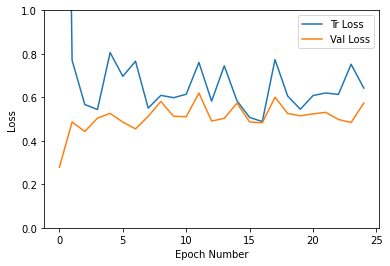

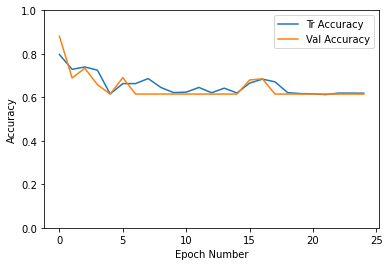

In [8]:
plotCost(history)

Select the best model (i.e. the weights file saved on the max epoch) to test.

In [3]:
saved_model = torch.load('src_model_0.pt')

In [11]:
computeTestSetAccuracy(saved_model, lossFunc)

[4996, 556]
5552
Test Batch number: 000, Test: Loss: 0.5800, Accuracy: 1.0000
Test Batch number: 001, Test: Loss: 0.0541, Accuracy: 1.0000
Test Batch number: 002, Test: Loss: 0.0004, Accuracy: 1.0000
Test Batch number: 003, Test: Loss: 0.0028, Accuracy: 1.0000
Test Batch number: 004, Test: Loss: 0.0191, Accuracy: 1.0000
Test Batch number: 005, Test: Loss: 0.3819, Accuracy: 1.0000
Test Batch number: 006, Test: Loss: 0.2229, Accuracy: 1.0000
Test Batch number: 007, Test: Loss: 0.0020, Accuracy: 1.0000
Test Batch number: 008, Test: Loss: 0.0275, Accuracy: 1.0000
Test Batch number: 009, Test: Loss: 0.3582, Accuracy: 1.0000
Test Batch number: 010, Test: Loss: 0.0263, Accuracy: 1.0000
Test Batch number: 011, Test: Loss: 0.1369, Accuracy: 1.0000
Test Batch number: 012, Test: Loss: 0.0192, Accuracy: 1.0000
Test Batch number: 013, Test: Loss: 0.0073, Accuracy: 1.0000
Test Batch number: 014, Test: Loss: 0.3422, Accuracy: 1.0000
Test Batch number: 015, Test: Loss: 0.4534, Accuracy: 1.0000
Test Ba

Test Batch number: 144, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 145, Test: Loss: 0.2261, Accuracy: 1.0000
Test Batch number: 146, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 147, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 148, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 149, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 150, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 151, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 152, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 153, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 154, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 155, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 156, Test: Loss: 0.9480, Accuracy: 0.0000
Test Batch number: 157, Test: Loss: 0.7595, Accuracy: 0.0000
Test Batch number: 158, Test: Loss: 0.0004, Accuracy: 1.0000
Test Batch number: 159, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 160, 

Test Batch number: 289, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 290, Test: Loss: 1.1299, Accuracy: 0.0000
Test Batch number: 291, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 292, Test: Loss: 0.5220, Accuracy: 1.0000
Test Batch number: 293, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 294, Test: Loss: 0.4324, Accuracy: 1.0000
Test Batch number: 295, Test: Loss: 0.1058, Accuracy: 1.0000
Test Batch number: 296, Test: Loss: 0.9377, Accuracy: 0.0000
Test Batch number: 297, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 298, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 299, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 300, Test: Loss: 0.3846, Accuracy: 1.0000
Test Batch number: 301, Test: Loss: 0.8034, Accuracy: 0.0000
Test Batch number: 302, Test: Loss: 0.2341, Accuracy: 1.0000
Test Batch number: 303, Test: Loss: 0.0201, Accuracy: 1.0000
Test Batch number: 304, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 305, 

Test Batch number: 433, Test: Loss: 0.0043, Accuracy: 1.0000
Test Batch number: 434, Test: Loss: 0.3010, Accuracy: 1.0000
Test Batch number: 435, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 436, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 437, Test: Loss: 0.2751, Accuracy: 1.0000
Test Batch number: 438, Test: Loss: 0.0950, Accuracy: 1.0000
Test Batch number: 439, Test: Loss: 0.1212, Accuracy: 1.0000
Test Batch number: 440, Test: Loss: 0.0003, Accuracy: 1.0000
Test Batch number: 441, Test: Loss: 0.0883, Accuracy: 1.0000
Test Batch number: 442, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 443, Test: Loss: 1.8922, Accuracy: 0.0000
Test Batch number: 444, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 445, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 446, Test: Loss: 4.3724, Accuracy: 0.0000
Test Batch number: 447, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 448, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 449, 

Test Batch number: 574, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 575, Test: Loss: 0.1530, Accuracy: 1.0000
Test Batch number: 576, Test: Loss: 1.8996, Accuracy: 0.0000
Test Batch number: 577, Test: Loss: 0.5670, Accuracy: 1.0000
Test Batch number: 578, Test: Loss: 0.8156, Accuracy: 0.0000
Test Batch number: 579, Test: Loss: 0.0157, Accuracy: 1.0000
Test Batch number: 580, Test: Loss: 0.0006, Accuracy: 1.0000
Test Batch number: 581, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 582, Test: Loss: 0.0002, Accuracy: 1.0000
Test Batch number: 583, Test: Loss: 0.0061, Accuracy: 1.0000
Test Batch number: 584, Test: Loss: 0.5108, Accuracy: 1.0000
Test Batch number: 585, Test: Loss: 0.0025, Accuracy: 1.0000
Test Batch number: 586, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 587, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 588, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 589, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 590, 

Test Batch number: 717, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 718, Test: Loss: 0.7629, Accuracy: 0.0000
Test Batch number: 719, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 720, Test: Loss: 0.1753, Accuracy: 1.0000
Test Batch number: 721, Test: Loss: 0.3443, Accuracy: 1.0000
Test Batch number: 722, Test: Loss: 0.3331, Accuracy: 1.0000
Test Batch number: 723, Test: Loss: 0.0008, Accuracy: 1.0000
Test Batch number: 724, Test: Loss: 0.1366, Accuracy: 1.0000
Test Batch number: 725, Test: Loss: 0.6721, Accuracy: 1.0000
Test Batch number: 726, Test: Loss: 0.0001, Accuracy: 1.0000
Test Batch number: 727, Test: Loss: 0.0004, Accuracy: 1.0000
Test Batch number: 728, Test: Loss: 0.0116, Accuracy: 1.0000
Test Batch number: 729, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 730, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 731, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 732, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 733, 

Test Batch number: 859, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 860, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 861, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 862, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 863, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 864, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 865, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 866, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 867, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 868, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 869, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 870, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 871, Test: Loss: 0.7070, Accuracy: 0.0000
Test Batch number: 872, Test: Loss: 0.0181, Accuracy: 1.0000
Test Batch number: 873, Test: Loss: 0.4399, Accuracy: 1.0000
Test Batch number: 874, Test: Loss: 0.0020, Accuracy: 1.0000
Test Batch number: 875, 

Test Batch number: 1001, Test: Loss: 0.4085, Accuracy: 1.0000
Test Batch number: 1002, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 1003, Test: Loss: 0.0204, Accuracy: 1.0000
Test Batch number: 1004, Test: Loss: 0.0460, Accuracy: 1.0000
Test Batch number: 1005, Test: Loss: 0.2844, Accuracy: 1.0000
Test Batch number: 1006, Test: Loss: 0.2468, Accuracy: 1.0000
Test Batch number: 1007, Test: Loss: 0.1259, Accuracy: 1.0000
Test Batch number: 1008, Test: Loss: 0.1884, Accuracy: 1.0000
Test Batch number: 1009, Test: Loss: 0.2416, Accuracy: 1.0000
Test Batch number: 1010, Test: Loss: 0.4629, Accuracy: 1.0000
Test Batch number: 1011, Test: Loss: 0.0305, Accuracy: 1.0000
Test Batch number: 1012, Test: Loss: 0.1541, Accuracy: 1.0000
Test Batch number: 1013, Test: Loss: 0.0004, Accuracy: 1.0000
Test Batch number: 1014, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 1015, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 1016, Test: Loss: 0.4261, Accuracy: 1.0000
Test Bat

Test Batch number: 1134, Test: Loss: 1.4104, Accuracy: 0.0000
Test Batch number: 1135, Test: Loss: 0.4102, Accuracy: 1.0000
Test Batch number: 1136, Test: Loss: 0.4598, Accuracy: 1.0000
Test Batch number: 1137, Test: Loss: 0.1612, Accuracy: 1.0000
Test Batch number: 1138, Test: Loss: 0.2626, Accuracy: 1.0000
Test Batch number: 1139, Test: Loss: 0.4692, Accuracy: 1.0000
Test Batch number: 1140, Test: Loss: 0.2015, Accuracy: 1.0000
Test Batch number: 1141, Test: Loss: 0.3971, Accuracy: 1.0000
Test Batch number: 1142, Test: Loss: 0.1964, Accuracy: 1.0000
Test Batch number: 1143, Test: Loss: 0.5423, Accuracy: 1.0000
Test Batch number: 1144, Test: Loss: 0.3255, Accuracy: 1.0000
Test Batch number: 1145, Test: Loss: 0.0956, Accuracy: 1.0000
Test Batch number: 1146, Test: Loss: 1.2918, Accuracy: 0.0000
Test Batch number: 1147, Test: Loss: 0.0006, Accuracy: 1.0000
Test Batch number: 1148, Test: Loss: 0.5286, Accuracy: 1.0000
Test Batch number: 1149, Test: Loss: 0.5051, Accuracy: 1.0000
Test Bat

Test Batch number: 1268, Test: Loss: 0.0004, Accuracy: 1.0000
Test Batch number: 1269, Test: Loss: 0.4235, Accuracy: 1.0000
Test Batch number: 1270, Test: Loss: 0.7016, Accuracy: 0.0000
Test Batch number: 1271, Test: Loss: 0.3910, Accuracy: 1.0000
Test Batch number: 1272, Test: Loss: 0.2411, Accuracy: 1.0000
Test Batch number: 1273, Test: Loss: 1.3898, Accuracy: 0.0000
Test Batch number: 1274, Test: Loss: 0.9386, Accuracy: 0.0000
Test Batch number: 1275, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 1276, Test: Loss: 0.3979, Accuracy: 1.0000
Test Batch number: 1277, Test: Loss: 0.1740, Accuracy: 1.0000
Test Batch number: 1278, Test: Loss: 0.4668, Accuracy: 1.0000
Test Batch number: 1279, Test: Loss: 0.0050, Accuracy: 1.0000
Test Batch number: 1280, Test: Loss: 0.4027, Accuracy: 1.0000
Test Batch number: 1281, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 1282, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 1283, Test: Loss: 0.3585, Accuracy: 1.0000
Test Bat

In [21]:
transform_example = transforms.Compose([transforms.Resize(size=256),
                            transforms.CenterCrop(size=224),
                            transforms.ToTensor(),
                            transforms.Normalize([0.485, 0.456, 0.406],
                                                 [0.229, 0.224, 0.225])])

dataset = datasets.ImageFolder('examples', transform=transform_example)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


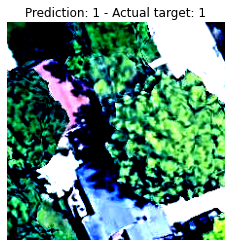

In [24]:
 # Disable grad
with torch.no_grad():
    
    # Retrieve item
    index = 0
    item = dataset[index]
    image = item[0]
    #true_target = item[1]
    imshow(image)
    image=image.to(device)
    # Loading the saved model

    
    # Generate prediction
    prediction = saved_model(image.unsqueeze(0))
    
    # Predicted class value using argmax
    predicted_class = np.argmax(prediction.cpu())
    
    # Reshape image

    image=image.cpu()
    image=image.swapaxes(0,1)
    image=image.swapaxes(1,2)
    
    # Show result
    plt.imshow(image.cpu(), cmap='nipy_spectral')
    plt.title(f'Prediction: {predicted_class} - Actual target: 1')
    plt.show()